# Analysis and Informal Plotting of Mouse Tracking Data

Before doing any of the Python snippets below, must first use `process.py` to parse raw data and generate a number of data files: 
- `processed.csv`, which contains the summary statistics
- `nx.csv`, `ny.csv`, `rx.csv`, and `rx.csv`, which contain the actual processed mouse trajectories.

Note: before process.py can operate correctly, there are a few trials that must be manually removed from CSV files.  They are listed in data/notes.md





In [1]:
import os 
import glob

import numpy as np # Numeric calculation
import pandas as pd # General purpose data analysis library
import squeak # For mouse data

# For plotting
import matplotlib.pyplot as plt 
%matplotlib inline
# Prettier default settings for plots (optional)
import seaborn
seaborn.set_style('white')
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
data = pd.read_csv('processed.csv') # import data from preprocessed CSV files
nx = pd.read_csv('nx.csv')
ny = pd.read_csv('ny.csv')
rx = pd.read_csv('rx.csv')
ry = pd.read_csv('ry.csv')

In [3]:
dataCorrect=data.loc[data['accuracy']==1] # include only correct trials


In [4]:
dataCorrect.rt=dataCorrect['rt'].astype(float) # convert some RTs to floats (not sure why this is occurring)  ignore the error that it throws
float(len(dataCorrect))/float(len(data)) # accuracy

/usr/local/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0.90563086548488

After subsetting on the correct trials, we can use the '.groupby()' function in Python to generate tables of means and SDs

In [7]:
# tables of means (USE THIS!!!)
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].mean()

                                             rt   init_time
truth size  operation SOAcondition                         
False large add       negative      1418.989664  415.968992
                      neutral       1468.063291  423.291139
            mult      negative      1366.359413  401.271394
                      neutral       1433.515815  414.549878
      small add       negative      1390.669856  397.177033
                      neutral       1444.979021  420.279720
            mult      negative      1306.337719  391.666667
                      neutral       1335.028761  409.292035
True  large add       negative      1366.836538  402.980769
                      neutral       1426.313253  422.313253
            mult      negative      1292.188053  403.805310
                      neutral       1308.269147  402.363239
      small add       negative      1193.835470  377.735043
                      neutral       1225.600000  400.127660
            mult      negative      1245

In [8]:
# tables of Standard Deviations (DON'T USE THIS!!!)
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['rt','init_time'].std()

                                            rt   init_time
truth size  operation SOAcondition                        
False large add       negative      379.252264  245.270875
                      neutral       421.874724  260.640180
            mult      negative      359.929460  218.273859
                      neutral       365.155425  228.457135
      small add       negative      367.478832  219.540991
                      neutral       406.020558  243.533022
            mult      negative      303.169586  217.831134
                      neutral       349.750474  221.945507
True  large add       negative      418.534710  257.526248
                      neutral       433.234028  269.026601
            mult      negative      371.872528  213.694432
                      neutral       342.807462  210.207957
      small add       negative      338.333573  201.099755
                      neutral       335.630282  205.196834
            mult      negative      346.488294  213.5517

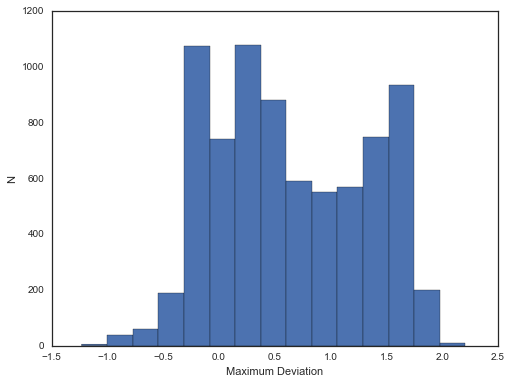

In [9]:
plt.hist(data.md, bins=15)
plt.xlabel("Maximum Deviation")
plt.ylabel("N")
plt.show()

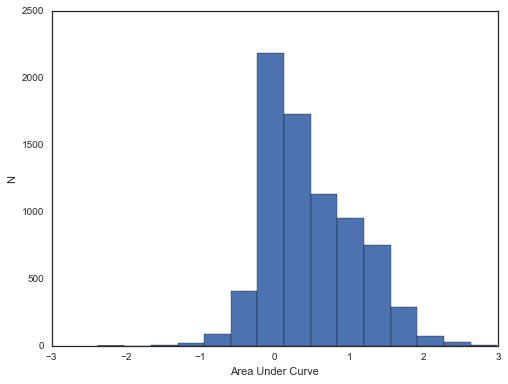

In [10]:
plt.hist(data.auc, bins=15)
plt.xlabel("Area Under Curve")
plt.ylabel("N")
plt.show()

In [12]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc','xflips'].mean()

                                          md       auc    xflips
truth size  operation SOAcondition                              
False large add       negative      0.765182  0.572442  0.852713
                      neutral       0.761911  0.575539  0.916456
            mult      negative      0.727968  0.577368  0.951100
                      neutral       0.788655  0.580850  0.968370
      small add       negative      0.828393  0.639300  0.889952
                      neutral       0.796726  0.608851  0.960373
            mult      negative      0.694819  0.576578  0.763158
                      neutral       0.742739  0.594083  0.763274
True  large add       negative      0.590198  0.386161  0.812500
                      neutral       0.611777  0.395669  0.853012
            mult      negative      0.563698  0.379735  0.750000
                      neutral       0.534507  0.369546  0.687090
      small add       negative      0.454027  0.319186  0.561966
                      neu

In [13]:
print dataCorrect.groupby(['truth','size','operation','SOAcondition'])['md','auc','xflips'].std()

                                          md       auc    xflips
truth size  operation SOAcondition                              
False large add       negative      0.665497  0.616526  1.323957
                      neutral       0.679697  0.638564  1.680164
            mult      negative      0.667504  0.633775  1.597349
                      neutral       0.674668  0.621605  1.663517
      small add       negative      0.653940  0.619250  1.380698
                      neutral       0.685138  0.620170  1.633703
            mult      negative      0.637679  0.627081  1.301243
                      neutral       0.650082  0.590705  1.145385
True  large add       negative      0.680544  0.605686  1.609741
                      neutral       0.676232  0.559256  1.436274
            mult      negative      0.661898  0.585032  1.302181
                      neutral       0.640173  0.587365  1.286105
      small add       negative      0.670176  0.585762  1.142148
                      neu

In [14]:
# get TRUE Addition trials
dataTrueAdd=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='add')]


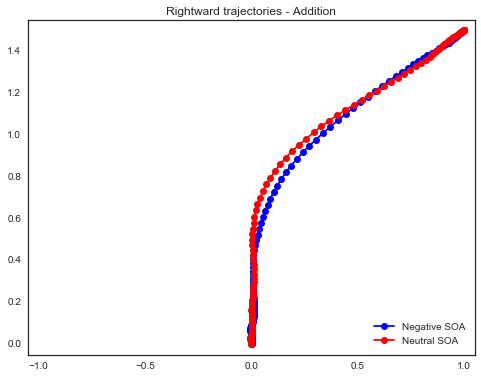

In [15]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueAdd.loc[dataTrueAdd['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

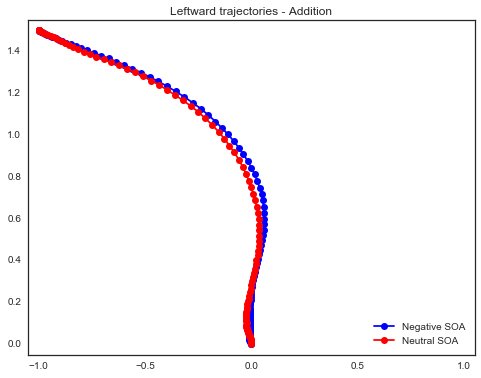

In [16]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueAdd.loc[dataTrueAdd['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Addition")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

In [17]:
# get TRUE Multiplication trials
dataTrueMult=dataCorrect.loc[(dataCorrect['truth']==1) & (dataCorrect['operation']=='mult')]



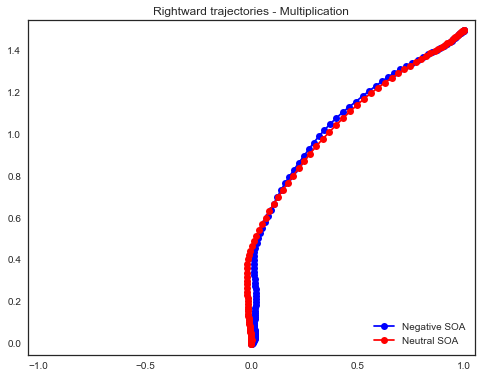

In [18]:
# Plot average *rightward* trajectories by SOAcondition
#dataRight=dataCorrect.loc[dataCorrect['response']==2] # plot ALL trials
dataRight=dataTrueMult.loc[dataTrueMult['response']==2] # plot only TRUE trials


negativeRight_indices = dataRight[dataRight.SOAcondition=='negative'].index
neutralRight_indices = dataRight[dataRight.SOAcondition=='neutral'].index

negRightX = nx.iloc[negativeRight_indices].mean()
negRightY = ny.iloc[negativeRight_indices].mean()

neutralRightX = nx.iloc[neutralRight_indices].mean()
neutralRightY = ny.iloc[neutralRight_indices].mean()



plt.plot(negRightX, negRightY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralRightX, neutralRightY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Rightward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()

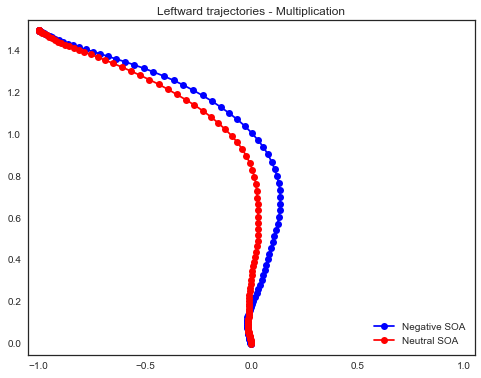

In [19]:
# Plot average *leftward* trajectories by SOAcondition
#dataLeft=dataCorrect.loc[dataTrue['response']==1] # plot ALL trials
dataLeft=dataTrueMult.loc[dataTrueMult['response']==1] # plot only TRUE trials



negativeLeft_indices = dataLeft[dataLeft.SOAcondition=='negative'].index
neutralLeft_indices = dataLeft[dataLeft.SOAcondition=='neutral'].index

negLeftX = -nx.iloc[negativeLeft_indices].mean()  # use negative since process.py remaps before computing AUC and MD
negLeftY = ny.iloc[negativeLeft_indices].mean()

neutralLeftX = -nx.iloc[neutralLeft_indices].mean()
neutralLeftY = ny.iloc[neutralLeft_indices].mean()



plt.plot(negLeftX, negLeftY, '-o', color='blue', label='Negative SOA')
plt.plot(neutralLeftX, neutralLeftY, '-o', color='red', label='Neutral SOA')
plt.legend(loc="lower right")
plt.title("Leftward trajectories - Multiplication")
plt.xlim((-1.05, 1.05))
plt.ylim((-.05, 1.55))
plt.show()